
# Sheetlet Packer Example Workflow

This notebook demonstrates the complete workflow for packing cells in a sheetlet, processing them through MATLAB, and generating visualizations.

We'll use seed 10 and index 0 as an example.



## 1. Import Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sheetlet_packer import SheetletPacker
import os
import scipy.io as sio
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.collections import PatchCollection
from calling_matlab import call_matlab_script


## 2. Run Sheetlet Packer

Initialize and run the packer for seed 10 and index 0.


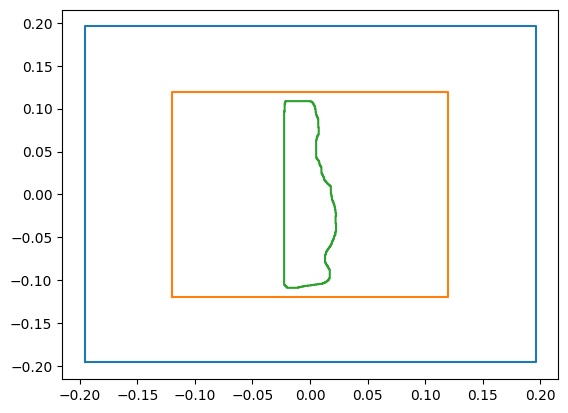

Initial Phase: Step 0
Initial Phase: Step 5
Initial Phase: Step 10
Initial Phase: Step 15
Initial Phase: Step 20
Initial Phase: Step 25
Initial Phase: Step 30
Initial Phase: Step 35
Initial Phase: Step 40
Initial Phase: Step 45
ICS 0.5859717137567412, step 0
ICS 0.6581102276406958, step 100
ICS 0.6666571488008081, step 200
ICS 0.6545083171001598, step 300
ICS 0.6682344584218398, step 400
ICS 0.6910871994544232, step 500
ICS 0.6547136570785448, step 600
ICS 0.7041825876487117, step 700
ICS 0.6996199534833548, step 800
ICS 0.6602834446541764, step 900
ICS 0.6873170336002942, step 1000
ICS 0.688623734411067, step 1100
ICS 0.6696412662493708, step 1200
ICS 0.704067264212278, step 1300
ICS 0.6885600457896628, step 1400
ICS 0.6818731274507978, step 1500
ICS 0.6960313694653093, step 1600
ICS 0.7093243560820743, step 1700
ICS 0.7033575708527908, step 1800
ICS 0.7139705738026461, step 1900
ICS 0.7058580870364379, step 2000
ICS 0.7489850563819797, step 2100


In [2]:

# Set parameters
seed = 10
index = 0
input_file = f'sheetlet_{index}.npy'
output_prefix = "output"

# Create packer instance
packer = SheetletPacker(input_file, index,celltype="real")

# Run packing process
packer.pack(output_prefix, seed=seed, isPlot=True)

#If it does not converge >2000 iterations change seed (changes the initial conditions for the cells) or increase a bit the attraction parameter (curr=0.9*rep)

In the image directory you can see the packing density vs the number of iterations and different stages of the sheetlet packer 

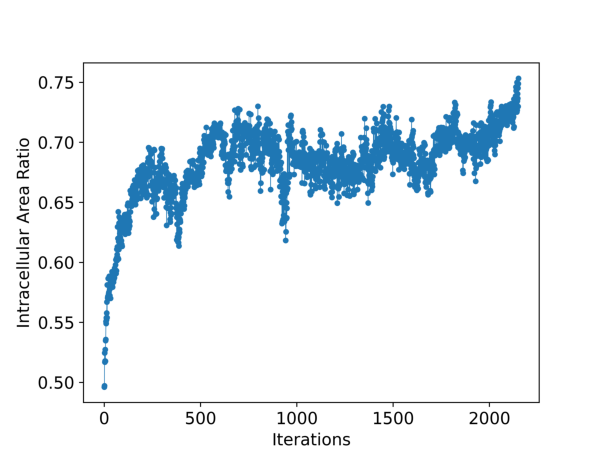

In [3]:
image = plt.imread("images/cellgrid_output_sheetlet_index_0_seed_10_ics.png")
plt.imshow(image, interpolation='antialiased')
plt.axis('off')
plt.tight_layout()
plt.show()


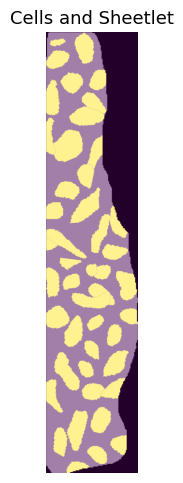

In [4]:
cells = plt.imread("images/cellgrid_output_sheetlet_index_0_seed_10_cells.png")
sheetlet = plt.imread("images/cellgrid_output_sheetlet_index_0_seed_10_sheetlet.png")
plt.imshow(cells, interpolation='antialiased')
plt.imshow(sheetlet, interpolation='antialiased',alpha=0.5,cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.title("Cells and Sheetlet")
plt.show()


## 3. Process with MATLAB

Run the MATLAB processing script to thicken cells and remove overlaps.


In [5]:

# Set MATLAB script parameters
matlab_script = os.path.abspath('matlab_scripts/grow_cells_uniform.m')
cells_file = f'../matlab_inputs/{output_prefix}_sheetlet_index_{index}_seed_{seed}_cells.mat'
sheetlet_file = f'../matlab_inputs/{output_prefix}_sheetlet_index_{index}_seed_{seed}_sheetlet.mat'
resolution = 0.06/1000  # mm per pixel
targetECV = 0.125  # Target extracellular volume
output_file = f'output_sheetlet_index_{index}_seed_{seed}'

# Call MATLAB script using the function from calling_matlab.py
call_matlab_script(matlab_script, cells_file, sheetlet_file, resolution, resolution, targetECV, output_file)


Executing MATLAB command: cd('/Users/ia4118/Desktop/PHDLITERATUREREVIEW/sheetlet_packer/matlab_scripts'); grow_cells_uniform('../matlab_inputs/output_sheetlet_index_0_seed_10_cells.mat', '../matlab_inputs/output_sheetlet_index_0_seed_10_sheetlet.mat', 5.9999999999999995e-05, 5.9999999999999995e-05, 0.125, 'output_sheetlet_index_0_seed_10'); quit;


2025-05-06 12:11:39.089 MATLAB[684:1375382] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2025-05-06 12:11:39.089 MATLAB[684:1375382] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2025-05-06 12:11:39.094 MATLAB[684:1375382] CoreText note: Client requested name ".SFNS-Bold", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2025-05-06 12:11:39.103 MATLAB[684:1375382] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2025-05-06 12:11:39.10

MATLAB script executed successfully. Output:

                            < M A T L A B (R) >
                  Copyright 1984-2023 The MathWorks, Inc.
                  R2023a (9.14.0.2206163) 64-bit (maci64)
                             February 22, 2023

 
To get started, type doc.
For product information, visit www.mathworks.com.
 
inconsistencies that may produce inaccurate or unexpected results. Input data
has been modified to create a well-defined polyshape. 
> In polyshape/checkAndSimplify (line 523)
In polyshape (line 175)
In grow_cells_uniform (line 87) 

total_area =

   6.7975e-05

inconsistencies that may produce inaccurate or unexpected results. Input data
has been modified to create a well-defined polyshape. 
> In polyshape/checkAndSimplify (line 523)
In polyshape (line 175)
In grow_cells_uniform (line 87) 

total_area =

   1.5190e-04

inconsistencies that may produce inaccurate or unexpected results. Input data
has been modified to create a well-defined polyshape. 
> I

The matlab script has created two files in the matlab_output folder containing the cells before and after thickening. 

In [7]:
from meshing.utils import return_vertices

#These are the centroids for each sheetlet. These are obtained from the ROI selected by Jan
centroids = [
    [0.022600500000000003, 0.2829195],
    [0.24740850000000003, 0.0375915], 
    [0.2508285, 0.0927675],
    [0.1904085, 0.15341549999999998], 
    [0.07093650000000001, 0.28497150000000004],
    [0.1128885, 0.2409675],
    [0.1445805, 0.3084555],
    [0.20454450000000002, 0.3038955], 
    [0.29414850000000003, 0.2918115], 
    [0.37235250000000003, 0.1340355], 
    [0.3728085, 0.28451550000000003], 
    [0.44326050000000006, 0.2788155]]

filename_after_thicken = f"matlab_outputs/after_thicken_output_sheetlet_index_0_seed_10.mat"
data = sio.loadmat(filename_after_thicken)
polygons = data['polygons']
polygons_shapely = return_vertices(polygons,centroids[0])

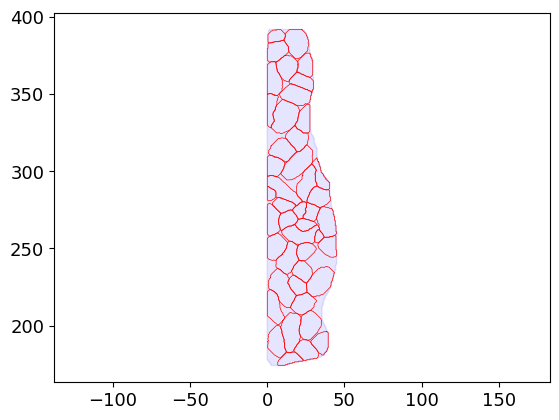

In [32]:
import shapely

filename_sheetlet = "sheetlet_" + str(0) + ".npy"
data = np.load(filename_sheetlet, allow_pickle=True)
cells, sheetlet_boundary, centroid = data[0], data[1], data[2]

#we have to scale by 1000 the boundary/centroid as it is in mm and cells are in um
sheetlet_boundary = shapely.affinity.scale(sheetlet_boundary, xfact=1000, yfact=1000, origin=(0,0))
sheetlet_poly = shapely.affinity.translate(sheetlet_boundary, xoff=+centroid[0]*1000, yoff=+centroid[1]*1000)

plt.fill(*sheetlet_poly.exterior.xy, color='blue',alpha=0.1)
for poly in polygons_shapely:
    plt.plot(poly.exterior.xy[0], poly.exterior.xy[1], color='red',linewidth=0.5)
plt.axis('equal')
plt.show()

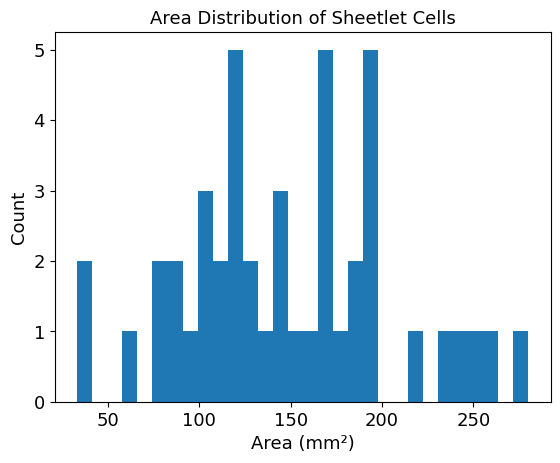

In [34]:
areas = [poly.area for poly in polygons_shapely]
plt.hist(areas, bins=30)
plt.xlabel('Area (mm²)')
plt.ylabel('Count')
plt.title('Area Distribution of Sheetlet Cells')
plt.show()
